In [36]:
import sklearn.metrics as metrics
import sklearn.linear_model as linear_model
from sklearn.linear_model import LinearRegression
import numpy as np
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
## Load the data into a DataFrame
stores=pd.read_csv('/Users/austinlasseter/DSI-EC-2/projects/datasets/stores_postEDA.csv')
stores=stores.drop(['Unnamed: 0'], axis=1)

## What's the R-squared of our model?

In [6]:
stores.columns

Index(['store_id', 'fips', 'metro', 'unemployment', 'income', 'population',
       'ave_bottle_price', 'ave_number_bottles', 'annual_profit_per_store',
       'unemp_bins', 'income_bins', 'pop_bins'],
      dtype='object')

In [55]:
# This is model #5 from the previous notebook (I'm using SK Learn this time, not stats models)
dep = stores['annual_profit_per_store'] # This is the outcome I want to predict
indep = stores.drop(['store_id', 'fips','unemp_bins', 'income_bins', 
                     'pop_bins', 'annual_profit_per_store', 'unemployment', 'population'], 
                    axis = 'columns') # These are the features that predict it
lm = linear_model.LinearRegression(fit_intercept=True,
                                   normalize=False,
                                   copy_X=True,
                                   n_jobs=1)
lm.fit(X=indep, y=dep)
predicted = lm.predict(X=indep) # y_preds
true = dep

In [53]:
# What's the distribution of our true values?
dep.describe()

count      1291.000000
mean      48249.495300
std       56430.637266
min         267.624000
25%       11712.432200
50%       26298.034600
75%       61575.715800
max      295762.362600
Name: annual_profit_per_store, dtype: float64

In [60]:
# What's the distribution of our predicted values?
preds=pd.DataFrame(predicted)
preds.describe()

,0
count,1291.000000
mean,48249.495300
std,20351.689714
min,-7526.213144
25%,34144.540126
50%,46092.736054
75%,60144.181381
max,171460.425274


In [73]:
# This is our R-sqsuared score: we explain about 12% of the variability in the out
print(slr.score(indep, dep))

0.128339788801


[Text(0,0.5,'True Annual Profit'), Text(0.5,0,'Predicted Annual Profit')]

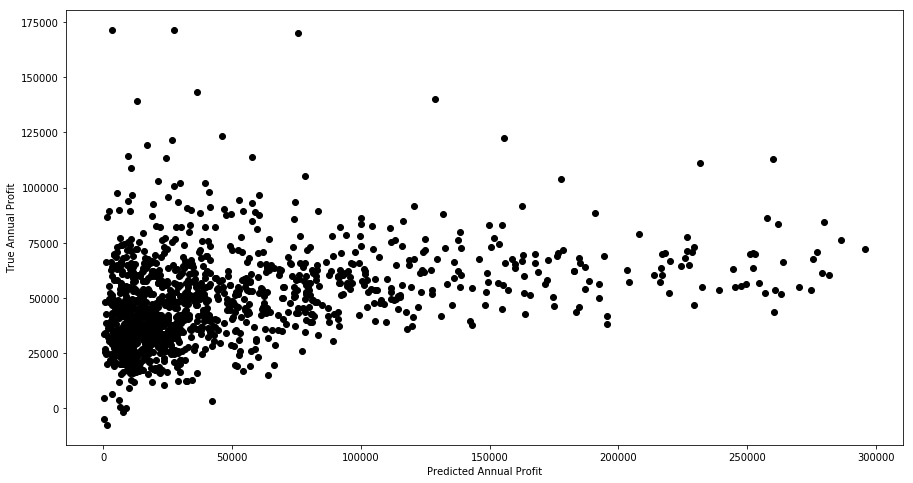

In [63]:
# create a figure
fig = plt.figure(figsize=(15,7))
fig.set_figheight(8)
fig.set_figwidth(15)

# get the axis
ax = fig.gca()

# plot it
ax.scatter(x=dep, y=preds, c='k')
ax.set(xlabel='Predicted Annual Profit', ylabel='True Annual Profit')
# ax.plot(stores['annual_profit_per_store'], preds, color='b');

## Train-Test Split

In [27]:
# Train-test split
from sklearn.model_selection import train_test_split

In [64]:
y = stores['annual_profit_per_store'] 

X = stores.drop(['store_id', 'fips','unemp_bins', 'income_bins', 
                     'pop_bins', 'annual_profit_per_store', 'unemployment', 'population'], 
                    axis = 'columns')

In [65]:
# cross-validation-train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [66]:
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1291, 4) (1291,)
(645, 4) (645,)
(646, 4) (646,)


In [67]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [69]:
# This is our R-squared of our model on the training data:
print(slr.score(X_train, y_train))

0.146683366422


In [ ]:
# This is the R-squared of our model on the test data: It went down, but not by too much.
print(slr.score(X_test, y_test))

## K-folds crossvalidation

In [70]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn import metrics

In [71]:
# Iterate using CV scores to determine how you're doing
# model selection/tuning stage
lr = LinearRegression()
print(cross_val_score(slr, X, y, cv=5))
scores=cross_val_score(slr, X, y, cv=5)
print(np.mean(scores))
# these are all R-squared scores ON THE TRAINING DATA (across 5 folds), and their average.
lr.fit(X,y)
# One last fit on ALL the training data

[-0.5914411   0.00413415 -0.44518569 -1.38794199 -0.26822735]
-0.53773239652


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [72]:
# Now we're predicting/scoring ON THE TESTING DATA
predictions = cross_val_predict(lr, X, y, cv=5) # Note: lr was defined in the previous cell.
r2 = metrics.r2_score(y, predictions)
print(r2) 

-0.0402673219072


In [ ]:
# I'm getting a negative R squared. What's up with that?